In [17]:
import numpy as np
import pandas as pd

from scipy.linalg import inv
from numpy.linalg import eig
from numpy.linalg import matrix_rank

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [2]:
data_train = np.load('data/fashion_train.npy', mmap_mode='r')
data_test = np.load('data/fashion_test.npy', mmap_mode='r')

In [3]:
X_train = data_train[:, :-1]
y_train = data_train[:, -1]

In [4]:
class LDA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        
        means = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))

        for c in class_labels:
            # Find within class scatter matrix
            X_c = X[y==c]
            mean_c = np.mean(X_c, axis=0)

            # Sum of SW_c
            SW += (X_c -mean_c).T.dot((X_c-mean_c))

            # Find between class scatter matrix
            n_c = X_c.shape[0]
            mean_diff = (mean_c - means).reshape(n_features,1)

            # Sum of SB
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Find the inverse of SW
        SW_inv = inv(SW)

        # Find SW^-1SB
        A = SW_inv.dot(SB)

        # Find the eigenvectors and eigenvalues of A
        eigenvalues, eigenvectors = eig(A)
        eigenvectors = eigenvectors.T

        # Get indexes of maximum eigenvalues
        idx = np.argsort(eigenvalues.real)[::-1]

        # Get sorted eigenvalues and eigenvectors
        eigenvalues, eigenvectors = eigenvalues[idx], eigenvectors[idx].real

        # Save the n first eigenvectors
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

In [8]:
clf = LDA(n_components=4)
clf.fit(X_train, y_train)
transformed_X_train= clf.transform(X_train)

In [18]:
# Transform to pandas data frame
d = {'LDA1': transformed_X_train[:,0], 'LDA2': transformed_X_train[:,2], 'LDA3': transformed_X_train[:,2], 'LDA4': transformed_X_train[:,3]}
X_train_transformed = pd.DataFrame(d)

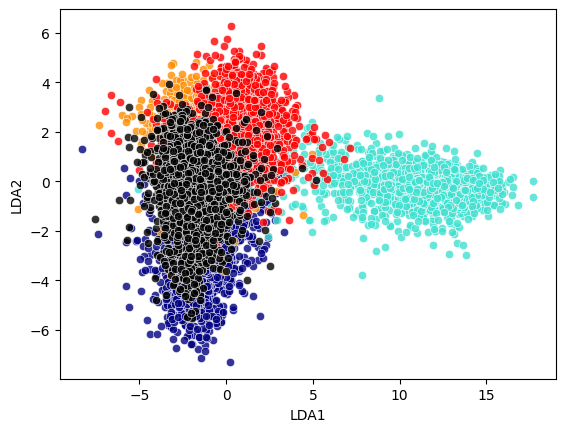

In [29]:
fig, ax = plt.subplots()

colors = ["navy", "turquoise", "darkorange", 'red', 'black', 'green']
components = ['LDA1', 'LDA2', 'LDA3', 'LDA4']

for k, c in enumerate(colors):
    sns.scatterplot(X_train_transformed[y_train == k], x='LDA1', y='LDA2', alpha=0.8, color=c, ax=ax)

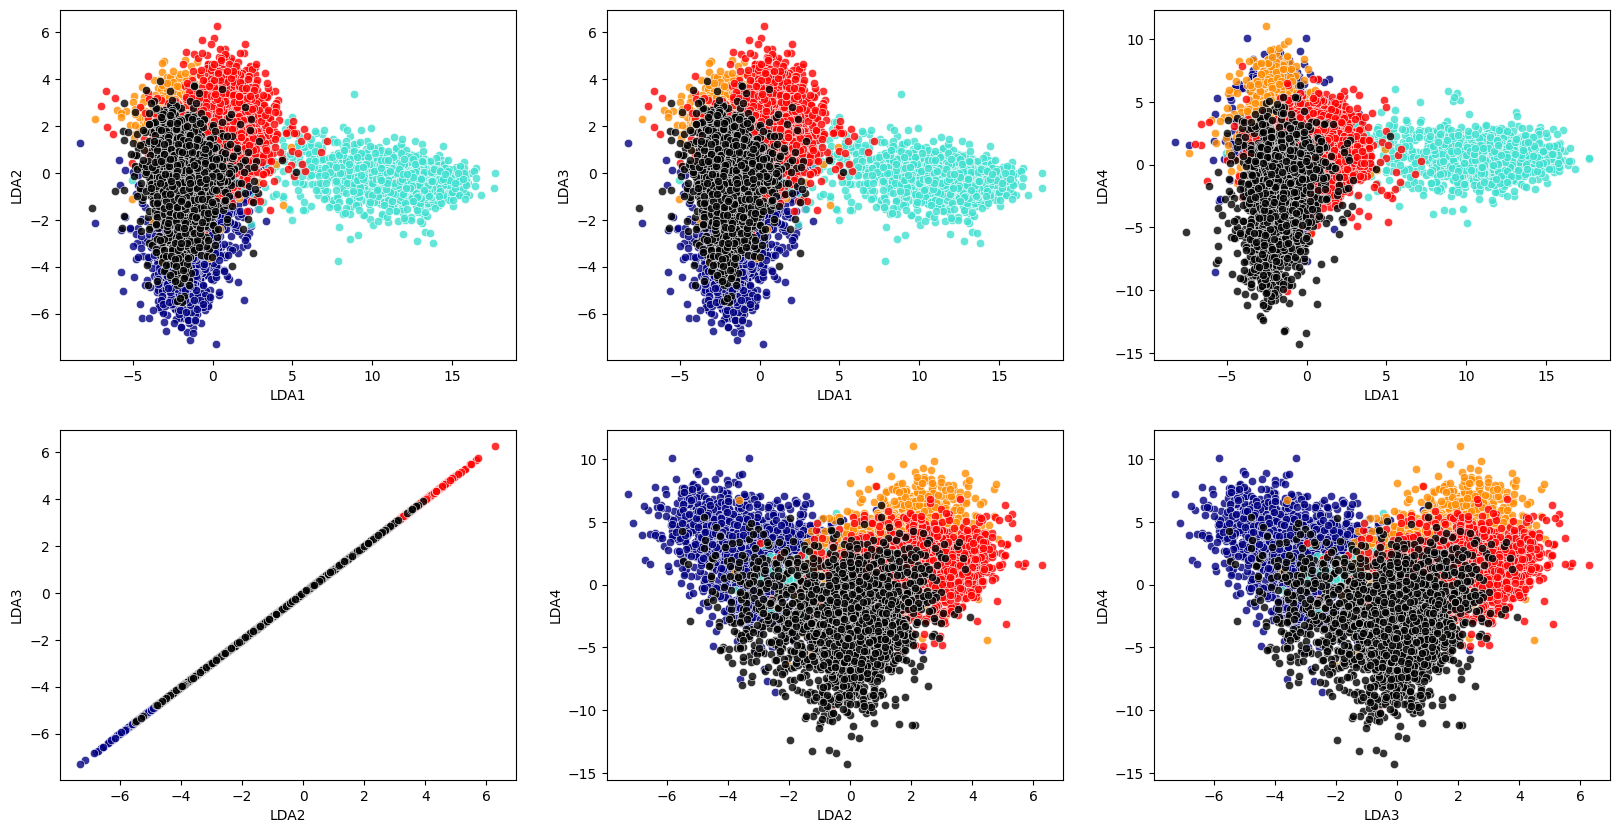

In [27]:
fig, ax = plt.subplots(2, 3, figsize = (20,10))

colors = ["navy", "turquoise", "darkorange", 'red', 'black', 'green']
components = ['LDA1', 'LDA2', 'LDA3', 'LDA4']

for k, c in enumerate(colors):
    sns.scatterplot(X_train_transformed[y_train == k], x='LDA1', y='LDA2', alpha=0.8, color=c, ax=ax[0,0])

for k, c in enumerate(colors):
    sns.scatterplot(X_train_transformed[y_train == k], x='LDA1', y='LDA3', alpha=0.8, color=c, ax=ax[0,1])

for k, c in enumerate(colors):
    sns.scatterplot(X_train_transformed[y_train == k], x='LDA1', y='LDA4', alpha=0.8, color=c, ax=ax[0,2])

for k, c in enumerate(colors):
    sns.scatterplot(X_train_transformed[y_train == k], x='LDA2', y='LDA3', alpha=0.8, color=c, ax=ax[1,0])

for k, c in enumerate(colors):
    sns.scatterplot(X_train_transformed[y_train == k], x='LDA2', y='LDA4', alpha=0.8, color=c, ax=ax[1,1])

for k, c in enumerate(colors):
    sns.scatterplot(X_train_transformed[y_train == k], x='LDA3', y='LDA4', alpha=0.8, color=c, ax=ax[1,2])